## Project 1 - Clusters 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import collections
import queue
import scipy.io as spio

In [2]:
data_input = [i.strip().split() for i in open("./cluster.dat").readlines()]
data_input = pd.DataFrame(data_input)
data_input[0] = pd.to_numeric(data_input[0])
data_input[1] = pd.to_numeric(data_input[1])

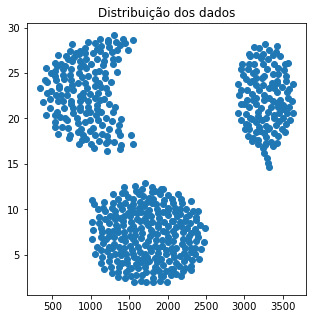

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(data_input[0], data_input[1])
plt.title('Distribuição dos dados')
plt.show()

In [4]:
data_input.describe()

,0,1
count,573.000000,573.000000
mean,1849.808028,15.227836
std,900.129972,8.292268
min,335.000000,1.950000
25%,1155.000000,7.450000
50%,1655.000000,17.200000
75%,2350.000000,22.750000
max,3635.000000,29.150000


In [5]:
def train_test_split(x, train_per = 0.9, test_per = 0.1,shuffle = True):
    
    n_samples = len(x)
    n_train, n_test = round(train_per*n_samples), round(test_per*n_samples)
    
    if shuffle:
        x_teste = x.reindex(np.random.permutation(x.index))
        train = x.iloc[:n_train]
        test = x.iloc[n_train:n_test+n_train]
    else:
        train = x.iloc[:n_train]
        test = x.iloc[n_train:n_test+n_train]
        
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
        
    return train, test

In [6]:
train, test = train_test_split(data_input)

In [7]:
def normalization(x, min_x, max_x):
    return (x - min_x) / (max_x - min_x) 


test[0] = test[0].apply(lambda x: normalization(x, min(train[0]), max(train[0])))
test[1] = test[1].apply(lambda x: normalization(x, min(train[1]), max(train[1])))
train[0] = train[0].apply(lambda x: normalization(x, min(train[0]), max(train[0])))
train[1] = train[1].apply(lambda x: normalization(x, min(train[1]), max(train[1])))

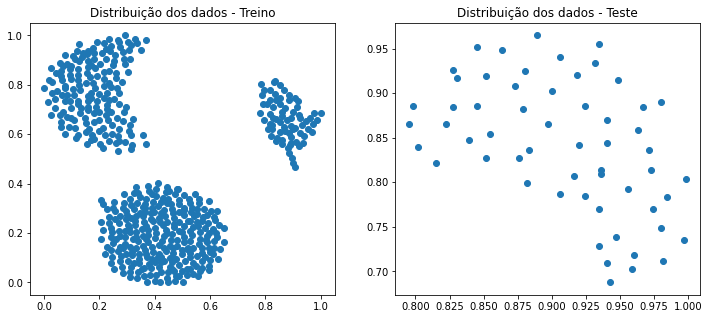

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(train[0], train[1])
plt.title('Distribuição dos dados - Treino')


plt.subplot(1,2,2)
plt.scatter(test[0], test[1])
plt.title('Distribuição dos dados - Teste')
plt.show()

In [23]:
from sklearn.cluster import Birch
brc = Birch(branching_factor = 50, n_clusters = None, threshold = 0.15)
brc.fit(train)

Birch(n_clusters=None, threshold=0.15)

In [24]:
train['label'] = brc.predict(train)
test['label'] = brc.predict(test)

In [25]:
train = train.rename({0: 'x', 1: 'y'}, axis=1)
test = test.rename({0: 'x', 1: 'y'}, axis =1 )

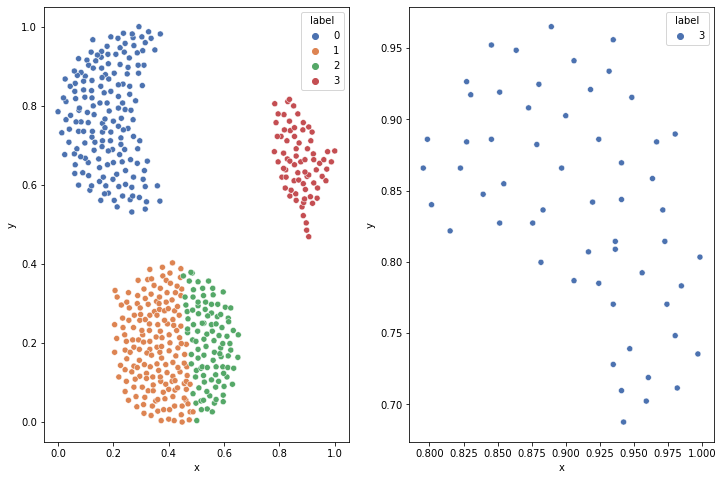

In [42]:
import seaborn as sns 


plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(data=train, x="x", y="y", hue="label", palette="deep")

plt.subplot(1,2,2)
sns.scatterplot(data=test, x="x", y="y", hue="label", palette="deep")
plt.show()